In [1]:
import pandas as pd
df = pd.read_csv('/Users/noelm/Downloads/data_dt.csv')
df.head()

,ID,Age,Income,Gender,Marital Status,Buys
0,1,0-21,High,Male,Single,No
1,2,0-21,High,Male,Married,No
2,3,21-35,High,Male,Single,Yes
3,4,35-100,Medium,Male,Single,Yes
4,5,35-100,Low,Female,Single,Yes


In [2]:
%pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [10]:
conda install graphviz

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\noelm\anaconda3

  added / updated specs:
    - graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cairo-1.16.0               |       he04af86_2         1.5 MB
    expat-2.5.0                |       hd77b12b_0         225 KB
    fribidi-1.0.10             |       h62dcd97_0          63 KB
    getopt-win32-0.1           |       h2bbff1b_0          19 KB
    glib-2.69.1                |       h5dc1a3c_1         1.6 MB
    graphite2-1.3.14           |       hd77b12b_1          91 KB
    graphviz-2.50.0            |       hdb8b0d4_0         903 KB
    gts-0.7.6                  |       h63ab5a1_3         181 KB
    harfbuzz-4.3.0             |       hb646838_1         855 KB
    libffi-3.4.4               |       hd77b12b_0         113 KB
    libgd-2.3.3                |       ha43c60c_1    



==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 24.1.1

Please update conda by running

    $ conda update -n base -c defaults conda




In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Age'] = le.fit_transform(df['Age'])
df['Income'] = le.fit_transform(df['Income'])
df['Gender'] = le.fit_transform(df['Gender'])
df['Marital Status'] = le.fit_transform(df['Marital Status'])
df['Buys'] = le.fit_transform(df['Buys'])
df

,ID,Age,Income,Gender,Marital Status,Buys
0,1,0,0,1,1,0
1,2,0,0,1,0,0
2,3,1,0,1,1,1
3,4,2,2,1,1,1
4,5,2,1,0,1,1
5,6,2,1,0,0,0
6,7,1,1,0,0,1
7,8,0,2,1,1,0
8,9,0,1,0,0,1
9,10,2,2,0,1,1


In [5]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split(df.iloc[:,1:-1], df.iloc[:,-1], test_size=0.3,
random_state=5)
print(len(X_train))
print(len(X_test))
X_train


9
5


,Age,Income,Gender,Marital Status
13,2,2,1,0
11,1,2,1,0
4,2,1,0,1
8,0,1,0,0
9,2,2,0,1
0,0,0,1,1
12,1,0,0,1
6,1,1,0,0
3,2,2,1,1


In [6]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
DecisionTreeClassifier()

DecisionTreeClassifier()

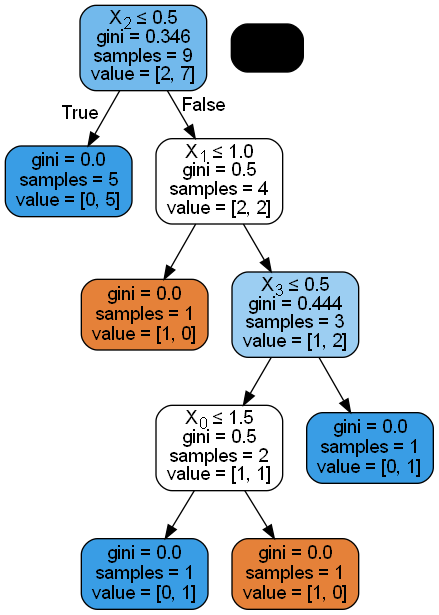

In [11]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,
filled=True, rounded=True,
special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [12]:
model.score(X_test, y_test)

0.4

In [13]:
model.predict([[0,1,0,0]])

C:\Users\noelm\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, model.predict(X_test))

array([[1, 2],
       [1, 1]], dtype=int64)

In [21]:
from sklearn import datasets
import pandas as pd
wine = datasets.load_wine()
x = pd.DataFrame(data=wine.data, columns=wine.feature_names) 
y = pd.DataFrame(wine.target, columns=['Target'])
x.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [22]:
y.head()

,Target
0,0
1,0
2,0
3,0
4,0


In [24]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,
random_state=5)
print(len(X_train))
print(len(X_test))
X_train.head()

119
59


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
71,13.86,1.51,2.67,25.0,86.0,2.95,2.86,0.21,1.87,3.38,1.36,3.16,410.0
83,13.05,3.86,2.32,22.5,85.0,1.65,1.59,0.61,1.62,4.80,0.84,2.01,515.0
15,13.63,1.81,2.70,17.2,112.0,2.85,2.91,0.30,1.46,7.30,1.28,2.88,1310.0
134,12.51,1.24,2.25,17.5,85.0,2.00,0.58,0.60,1.25,5.45,0.75,1.51,650.0
10,14.10,2.16,2.30,18.0,105.0,2.95,3.32,0.22,2.38,5.75,1.25,3.17,1510.0


In [25]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
DecisionTreeClassifier()

DecisionTreeClassifier()

In [26]:
model.score(X_test, y_test)

0.9322033898305084

In [27]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, model.predict(X_test))

array([[22,  2,  0],
       [ 1, 18,  1],
       [ 0,  0, 15]], dtype=int64)

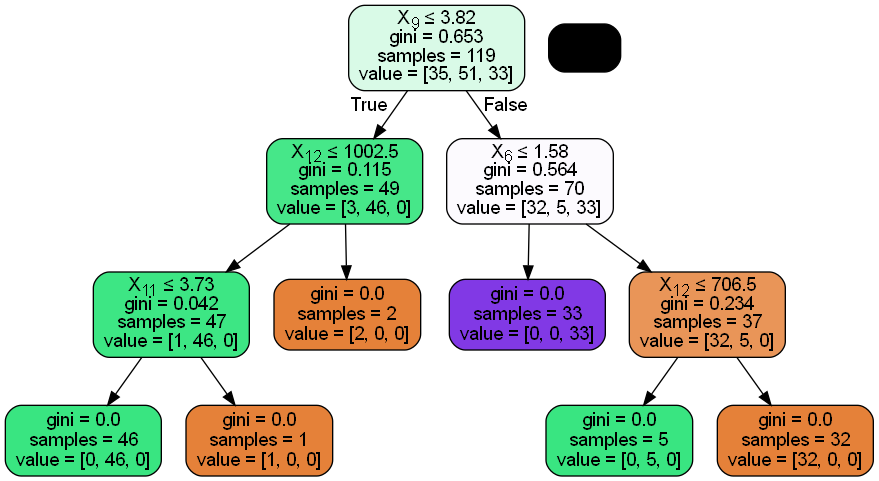

In [28]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,
filled=True, rounded=True,
special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [32]:
from sklearn.model_selection import cross_val_score 
scores = cross_val_score(model, wine.data, wine.target, cv=5) 
scores

array([0.94444444, 0.86111111, 0.86111111, 0.91428571, 0.85714286])

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_predict, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [34]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

In [35]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
# Creating the decision tree classifier
clf = DecisionTreeClassifier()

In [37]:
# K fold cross validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

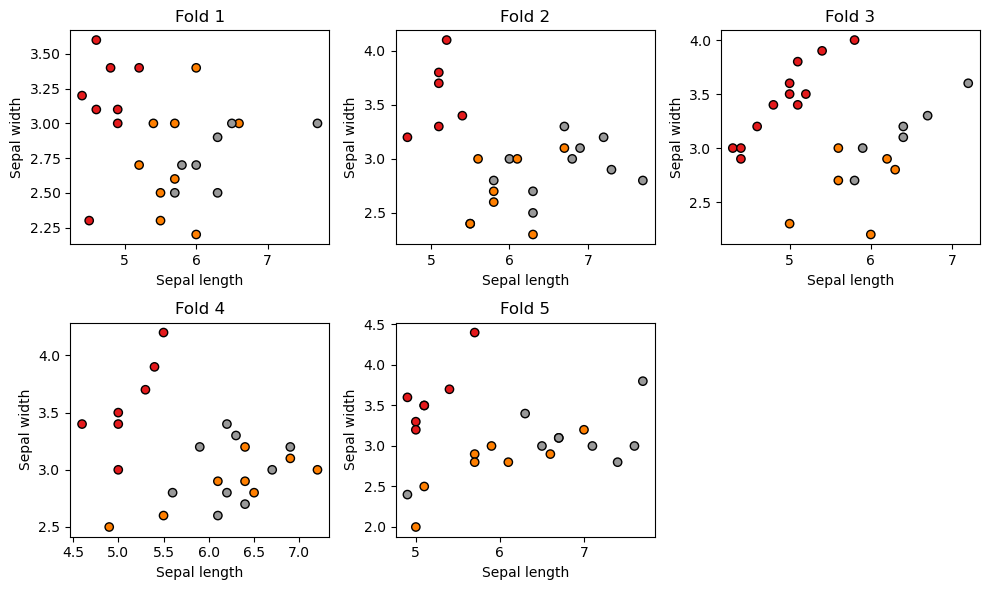

In [38]:
# Data visualization
plt.figure(figsize=(10, 6))
for i, (train_index, test_index) in enumerate(kf.split(X_train)):
    X_train_kf, X_val_kf = X_train[train_index], X_train[test_index]
    y_train_kf, y_val_kf = y_train[train_index], y_train[test_index]
    
    clf.fit(X_train_kf, y_train_kf)
    y_pred_kf = clf.predict(X_val_kf)
    
    plt.subplot(2, 3, i+1)
    plt.scatter(X_val_kf[:, 0], X_val_kf[:, 1], c=y_pred_kf, cmap=plt.cm.Set1, edgecolor='k')
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.title(f'Fold {i+1}')

plt.tight_layout()
plt.show()

In [39]:
# Confusion matrix and classification report
y_pred_test = cross_val_predict(clf, X_test, y_test, cv=5)
conf_mat = confusion_matrix(y_test, y_pred_test)
class_report = classification_report(y_test, y_pred_test)

print("Confusion Matrix:")
print(conf_mat)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[10  0  0]
 [ 1  7  1]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.78      0.88         9
           2       0.92      1.00      0.96        11

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



In [41]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import load_boston
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Load the Boston housing dataset
boston = load_boston()
X = boston.data
y = boston.target

In [42]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
# Creating the decision tree regressor
regressor = DecisionTreeRegressor()

In [44]:
# K fold cross validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

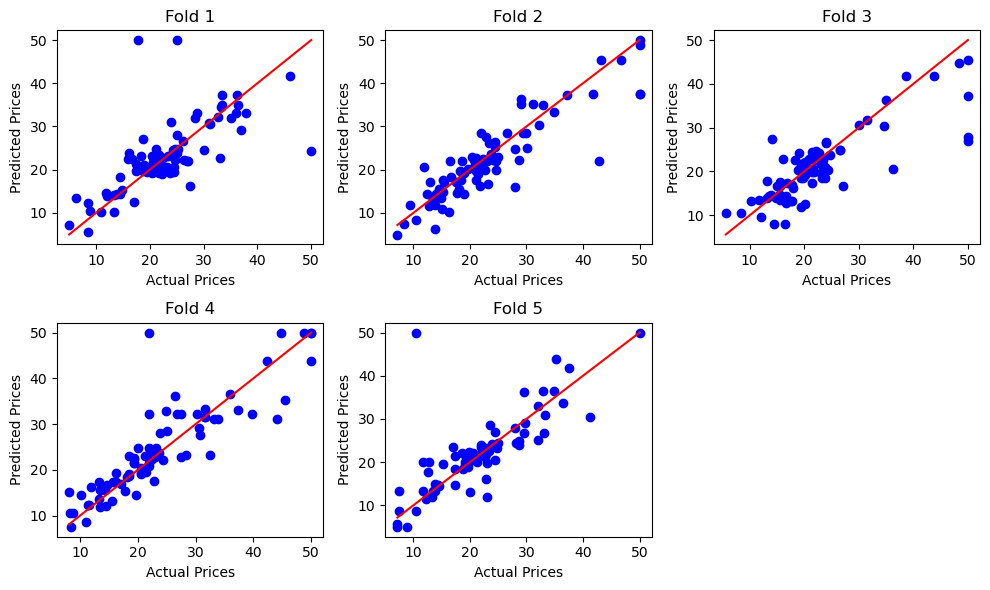

In [45]:
# Data visualization
plt.figure(figsize=(10, 6))
for i, (train_index, test_index) in enumerate(kf.split(X_train)):
    X_train_kf, X_val_kf = X_train[train_index], X_train[test_index]
    y_train_kf, y_val_kf = y_train[train_index], y_train[test_index]
    
    regressor.fit(X_train_kf, y_train_kf)
    y_pred_kf = regressor.predict(X_val_kf)
    
    plt.subplot(2, 3, i+1)
    plt.scatter(y_val_kf, y_pred_kf, color='blue')
    plt.plot([min(y_val_kf), max(y_val_kf)], [min(y_val_kf), max(y_val_kf)], color='red')
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
    plt.title(f'Fold {i+1}')

plt.tight_layout()
plt.show()

In [46]:
# Mean Squared Error
y_pred_test = cross_val_predict(regressor, X_test, y_test, cv=5)
mse = mean_squared_error(y_test, y_pred_test)

print("Mean Squared Error:", mse)

Mean Squared Error: 30.61754901960784
